<a href="https://colab.research.google.com/github/Krishna-Dhawangale/Machine-Learning-Practical/blob/main/ML_CS23032_Practical2_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Model for insurance dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# from sklearn.datasets import insurance # This import caused an error as 'insurance' is not a module in sklearn.datasets

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import pandas as pd

# Load a public 'Medical Cost Personal Datasets' insurance dataset
# from a URL, as 'insurance' is not directly available in sklearn.datasets.
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#step2: Feature & Target Split
x=df.drop('charges',axis=1)
y=df['charges']

In [ ]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape


(1070, 6)

In [ ]:
x_test.shape

(268, 6)

In [ ]:
y_train.shape

(1070,)

In [ ]:
y_test.shape

(268,)

In [ ]:
#step 4: Train Linear Regression Model
model=LinearRegression()
model.fit(x_train_encoded,y_train)

LinearRegression()

In [ ]:
# Apply one-hot encoding to categorical features in both training and test sets
x_train_encoded = pd.get_dummies(x_train, columns=['sex', 'smoker', 'region'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the head of the encoded training data to see the changes
print("x_train_encoded head:")
display(x_train_encoded.head())

print("\nx_test_encoded head:")
display(x_test_encoded.head())

x_train_encoded head:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.95,2,False,False,True,False,False
1285,47,24.32,0,False,False,False,False,False
1142,52,24.86,0,False,False,False,True,False
969,39,34.32,5,False,False,False,True,False
486,54,21.47,3,False,False,True,False,False



x_test_encoded head:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25.175,2,False,False,False,False,False
887,36,30.020,0,False,False,True,False,False
890,64,26.885,0,False,True,True,False,False
1293,46,25.745,3,True,False,True,False,False
259,19,31.920,0,True,True,True,False,False


In [ ]:
#step 4: Train Linear Regression Model with encoded data
model=LinearRegression()
model.fit(x_train_encoded,y_train)

LinearRegression()

In [ ]:
# Step 5: Make predictions on the encoded test set
y_pred = model.predict(x_test_encoded)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
R-squared (R2): 0.78


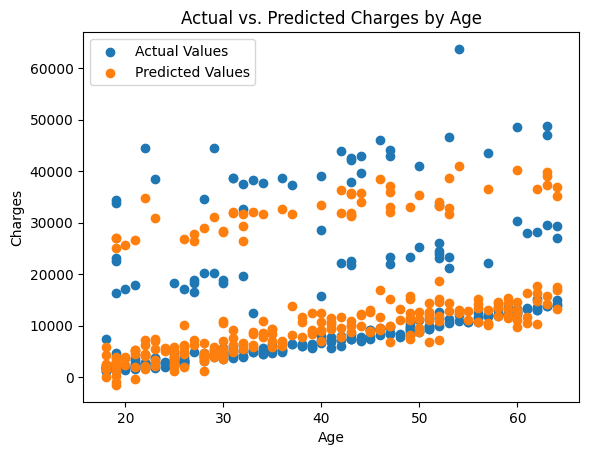

In [ ]:
plt.scatter(x_test_encoded['age'], y_test, label='Actual Values')
plt.scatter(x_test_encoded['age'], y_pred, label='Predicted Values')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Actual vs. Predicted Charges by Age')
plt.legend()
plt.show()